In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import math

In [ ]:
# fetature importance measurement (part1)

data= pd.read_csv('processes_datasets.csv')
#print('Dimension:',data.shape)
#data.head()



#Dropping null value rows of RunTime column
data.drop(data[(data['RunTime '] == -1)].index, inplace=True)

#print(data)

#Imputting missing values with mean values of ReqMemory column
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=-1, strategy='median')
impute.fit(data[['ReqMemory']])
data['ReqMemory'] = impute.transform(data[['ReqMemory']])
#print(data['ReqMemory'].value_counts())


#These columns has all -1 values(Dropping)
#ReqNProcs has only one unique value(Dropping)
data.drop(['JobStructure','JobStructureParams','UsedNetwork','UsedLocalDiskSpace','UsedResources','ReqPlatform','ReqNetwork',
          'ReqLocalDiskSpace','ReqResources','VOID','ProjectID'],axis=1,inplace=True)



#Encoding categorical values
data['QueueNO'] = data['QueueID'].rank(method='dense', ascending=False).astype(int)
data['GroupNO'] = data['GroupID'].rank(method='dense', ascending=False).astype(int)
data['ExecutableNO'] = data['ExecutableID'].rank(method='dense', ascending=False).astype(int)
data['OrigSiteNO'] = data['OrigSiteID'].rank(method='dense', ascending=False).astype(int)
data['LastRunSiteNO'] = data['LastRunSiteID'].rank(method='dense', ascending=False).astype(int)
data['USERNO'] = data['UserID'].rank(method='dense', ascending=False).astype(int)

data.drop(['UserID','QueueID','GroupID','ExecutableID','OrigSiteID','LastRunSiteID'],axis=1,inplace=True)


#print('Dimension:',data.shape)


#sns.heatmap(data.corr(), cmap = 'YlGnBu')

#data = data.sample(n=150000)


#X = data.drop('RunTime ',axis=1)
#y = data['RunTime ']





In [ ]:
# fetature importance measurement (part2)
def feature_eval(X_train, X_test, y_train, y_test):
  clf = LinearRegression()
  clf.fit(X_train,y_train)
  y_pred_lr=clf.predict(X_test)
  lrAccuracy = clf.score(X_test, y_test)
  return lrAccuracy


In [ ]:
# fetature importance measurement (part3)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression




col_list = list(data.columns.values)
importance ={}


for i in col_list:
  if i != 'RunTime ':

    X = data[i]
    X = np.array(X)
    X = X.reshape(-1, 1)
    y = data['RunTime ']
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=50)
    val = feature_eval(X_train, X_test, y_train, y_test)
    importance[i] = abs(val*100)

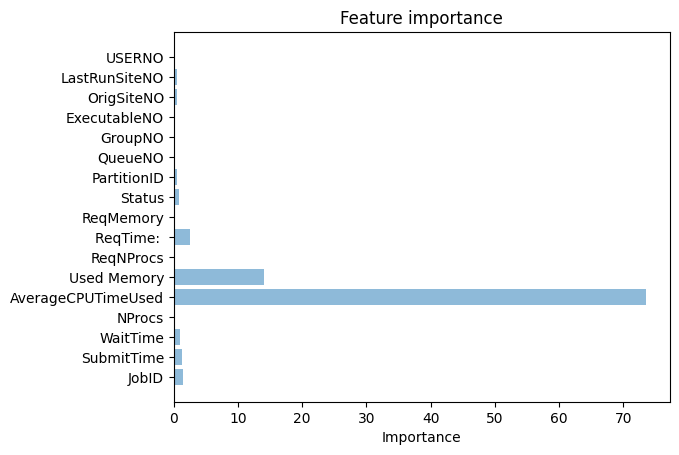

In [ ]:
# fetature importance measurement (part4)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



objects = importance.keys()
y_pos = np.arange(len(objects))
performance = importance.values()

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.title('Feature importance')

plt.show()


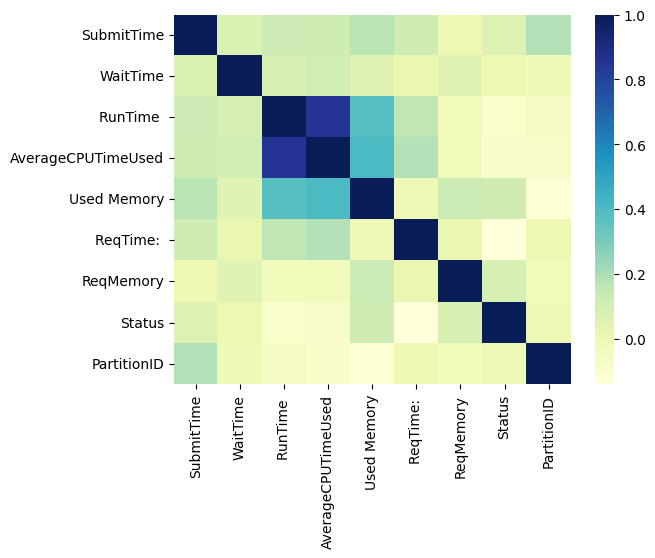

In [ ]:
#Loading dataset
data= pd.read_csv('processes_datasets.csv')
#print('Dimension:',data.shape)
data.head()



#Dropping null value rows of RunTime column
data.drop(data[(data['RunTime '] == -1)].index, inplace=True)

#print(data)

#Imputting missing values with mean values of ReqMemory column
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=-1, strategy='median')
impute.fit(data[['ReqMemory']])
data['ReqMemory'] = impute.transform(data[['ReqMemory']])
#print(data['ReqMemory'].value_counts())


#These columns has all -1 values(Dropping)
#ReqNProcs has only one unique value(Dropping)
data.drop(['JobID','ReqNProcs','JobStructure','JobStructureParams','UsedNetwork','UsedLocalDiskSpace','UsedResources','ReqPlatform','ReqNetwork',
          'ReqLocalDiskSpace','ReqResources','VOID','ProjectID','NProcs','QueueID','GroupID','ExecutableID','OrigSiteID','LastRunSiteID','UserID'],axis=1,inplace=True)



#Encoding categorical values
#data['QueueNO'] = data['QueueID'].rank(method='dense', ascending=False).astype(int)
#data['GroupNO'] = data['GroupID'].rank(method='dense', ascending=False).astype(int)
#data['ExecutableNO'] = data['ExecutableID'].rank(method='dense', ascending=False).astype(int)
#data['OrigSiteNO'] = data['OrigSiteID'].rank(method='dense', ascending=False).astype(int)
#data['LastRunSiteNO'] = data['LastRunSiteID'].rank(method='dense', ascending=False).astype(int)
#data['USERNO'] = data['UserID'].rank(method='dense', ascending=False).astype(int)

#data.drop(['UserID','QueueID','GroupID','ExecutableID','OrigSiteID','LastRunSiteID','PartitionID','OrigSiteNO', 'ExecutableNO','LastRunSiteNO',],axis=1,inplace=True)


#print('Dimension:',data.shape)
#print(data.head())

sns.heatmap(data.corr(), cmap = 'YlGnBu')

#data = data.sample(n=150000)
data = data[0:50000]
data_lstm = data[0:50000]


X = data.drop('RunTime ',axis=1)
y = data['RunTime ']
data_exp = y[0:50000]





In [ ]:
# For exponential avg (part 1)


ac_bt = data_exp


exp_avg_bt = []
flag_e = 0
tow_n = ac_bt[0]  # previous predicted bt
tow_n1 = 0 # next predicted bt
t = ac_bt[1]      #actual bt
alpha = 0.5 #factor

exp_avg_bt.append(tow_n)

for i in ac_bt:
  if flag_e > 0:

    t = i
    tow_n1 = alpha*t + (1-alpha)*tow_n
    exp_avg_bt.append(tow_n)

    tow_n = tow_n1
  flag_e += 1


In [ ]:
# For exponential avg (part 2)



from sklearn.metrics import  accuracy_score, r2_score
np.corrcoef(exp_avg_bt,ac_bt)
expAccuracy=r2_score(exp_avg_bt,ac_bt)


print(expAccuracy)

0.5142882284941444


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=50)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_minmax,y 
                                                   , test_size=0.30,random_state=50)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred_lr=clf.predict(X_test)
lrAccuracy = clf.score(X_test, y_test)
print(lrAccuracy)

0.8567114377501095


[0.9370722061755417, 0.9026522522409373, 0.836464057866804, 0.8253119882825748, 0.8287697153640221, 0.8453564707523824, 0.8600254529856254, 0.8409742271808094, 0.8444930917597452, 0.844275350063731, 0.8456117513053245, 0.8510221726877263, 0.8541137032544632, 0.854611462859419, 0.8555437209471419, 0.8577807877796012, 0.8614431400645735, 0.8586364129106996, 0.8625504924630178, 0.8648864135353003, 0.857820656804021, 0.8597949043119364, 0.8585098647343129, 0.8622160735703129, 0.8561782716803245, 0.8587354416100594, 0.8552293443270339, 0.8556325592306889, 0.8522111948723454, 0.8560155803332159, 0.8584940627250816, 0.8588071660193229, 0.8591477230667394, 0.8612152925779011]
[0.9917990845486275, 0.9085965754503421, 0.8438050949326623, 0.8003704397399821, 0.7899931667099184, 0.816326994767872, 0.8418747447169771, 0.8529455858850687, 0.8626864096150124, 0.8753410779884858, 0.8848520449176143, 0.8930332409400004, 0.8762576427605864, 0.8679895439449895, 0.8647935544022541, 0.8362957969689873, 0.8

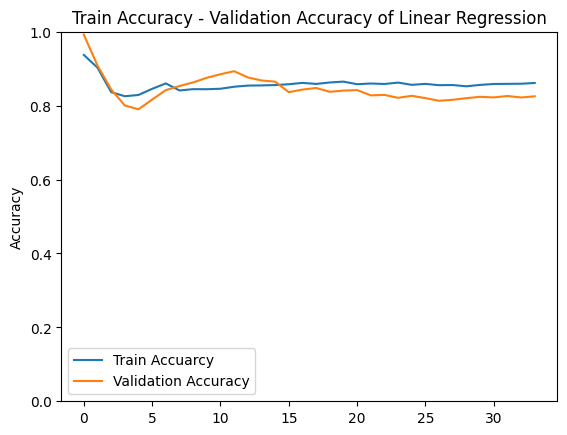

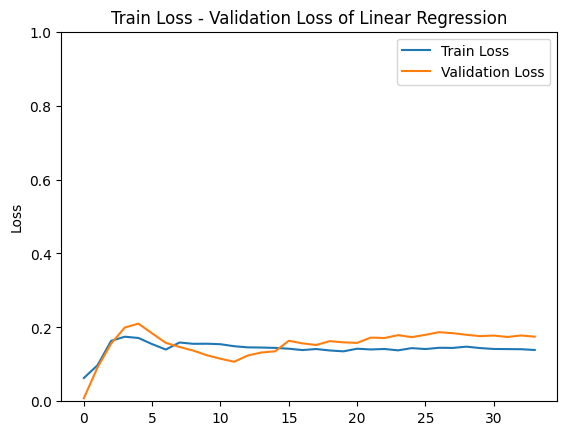

In [ ]:
# accuracy loss plot for liner regression

# accuracy loss plot for decission tree
from sklearn.linear_model import LinearRegression
training_accuracy  = []  
validation_accuracy = []
training_loss =[]
validation_loss=[]
idx_train=1000
idx_test=300

for i in range(1, 1000):
  if len(X_train)>idx_train  and len(X_test)>idx_test:
    clf = LinearRegression()
    clf = clf.fit(X_train[0:idx_train],y_train[0:idx_train])
    t1=clf.score(X_train[0:idx_train], y_train[0:idx_train])
    t2=clf.score(X_test[0:idx_test], y_test[0:idx_test])
    training_accuracy.append(t1)
    validation_accuracy.append(t2)
    training_loss.append(1-t1)
    validation_loss.append(1-t2)
    idx_train+=1000
    idx_test+=300
print(training_accuracy)
print(validation_accuracy)
print( len(training_accuracy),len(validation_accuracy))
plt.figure()
plt.plot(range(0, len(training_accuracy)), training_accuracy, label='Train Accuarcy')
plt.plot(range(0, len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.title('Train Accuracy - Validation Accuracy of Linear Regression')
#plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()


plt.figure()
plt.plot(range(0, len(training_loss)), training_loss, label='Train Loss')
plt.plot(range(0, len(validation_loss)), validation_loss, label='Validation Loss')
plt.title('Train Loss - Validation Loss of Linear Regression')
#plt.xlabel('n_neighbors')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()

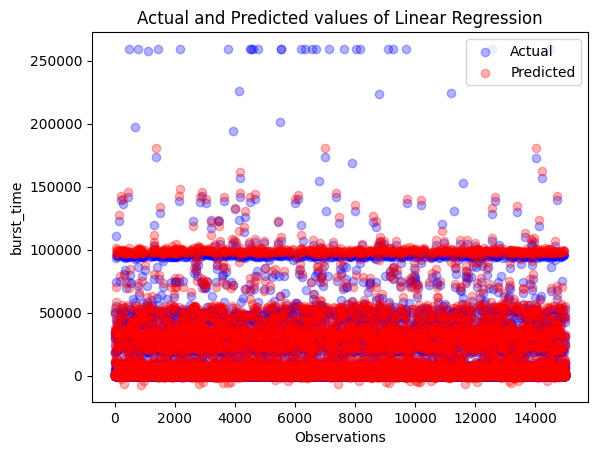

In [ ]:
# plot expected vs actual linear regression
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_lr.size), y=y_pred_lr, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and Predicted values of Linear Regression')
plt.xlabel('Observations')
plt.ylabel('burst_time')
plt.legend()
plt.show()

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=4, p=2,weights='uniform')
knnAccuracy=knn.score(X_test, y_test)
print(knnAccuracy)

#print(y_test)

0.1382


[0.526, 0.548, 0.5436666666666666, 0.55175, 0.5484, 0.5516666666666666, 0.5547142857142857, 0.5575, 0.5586666666666666, 0.5607, 0.5591818181818182, 0.5620833333333334, 0.5601538461538461, 0.5615, 0.5598666666666666, 0.5633125, 0.5651764705882353, 0.5665555555555556, 0.5663684210526316, 0.56625, 0.5664285714285714, 0.5657272727272727, 0.5670434782608695, 0.5673333333333334, 0.56696, 0.5677307692307693, 0.5664444444444444, 0.5663928571428571, 0.5668275862068965, 0.5662333333333334, 0.5662903225806452, 0.56665625, 0.5670909090909091, 0.5665]
[0.09666666666666666, 0.115, 0.11777777777777777, 0.1275, 0.12866666666666668, 0.13055555555555556, 0.13047619047619047, 0.13125, 0.1288888888888889, 0.133, 0.13090909090909092, 0.13416666666666666, 0.1335897435897436, 0.13285714285714287, 0.13333333333333333, 0.13270833333333334, 0.1331372549019608, 0.1335185185185185, 0.13596491228070176, 0.134, 0.13476190476190475, 0.13424242424242425, 0.1328985507246377, 0.13361111111111112, 0.13293333333333332, 0

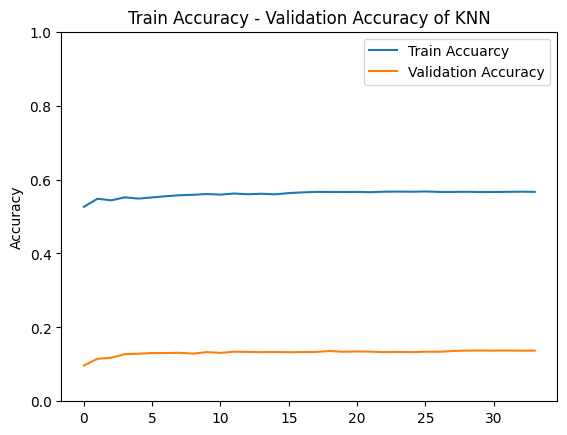

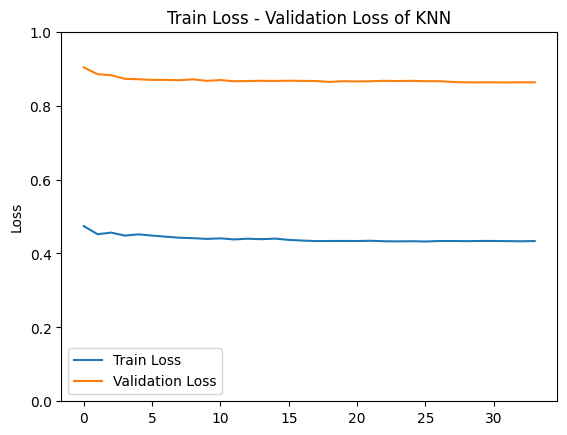

In [ ]:
# accuracy loss plot for knn
from sklearn.neighbors import KNeighborsClassifier
training_accuracy  = []  
validation_accuracy = []
training_loss =[]
validation_loss=[]
idx_train=1000
idx_test=300

for i in range(1, 1000):
  if len(X_train)>idx_train  and len(X_test)>idx_test:
    clf = KNeighborsClassifier(n_neighbors=2)
    clf = clf.fit(X_train[0:idx_train],y_train[0:idx_train])
    t1=clf.score(X_train[0:idx_train], y_train[0:idx_train])
    t2=clf.score(X_test[0:idx_test], y_test[0:idx_test])
    training_accuracy.append(t1)
    validation_accuracy.append(t2)
    training_loss.append(1-t1)
    validation_loss.append(1-t2)
    idx_train+=1000
    idx_test+=300
print(training_accuracy)
print(validation_accuracy)
print( len(training_accuracy),len(validation_accuracy))
plt.figure()
plt.plot(range(0, len(training_accuracy)), training_accuracy, label='Train Accuarcy')
plt.plot(range(0, len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.title('Train Accuracy - Validation Accuracy of KNN')
#plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()


plt.figure()
plt.plot(range(0, len(training_loss)), training_loss, label='Train Loss')
plt.plot(range(0, len(validation_loss)), validation_loss, label='Validation Loss')
plt.title('Train Loss - Validation Loss of KNN')
#plt.xlabel('n_neighbors')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()

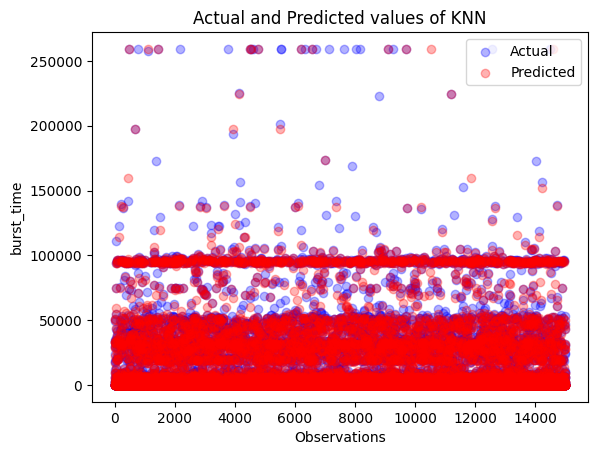

In [ ]:
# plot expected vs actual knn
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_knn.size), y=y_pred_knn, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and Predicted values of KNN')
plt.xlabel('Observations')
plt.ylabel('burst_time')
plt.legend()
plt.show()

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
y_pred_rf=rfc.predict(X_test)
rfAcuracy = rfc.score(X_test, y_test)
print(rfAcuracy)

0.16


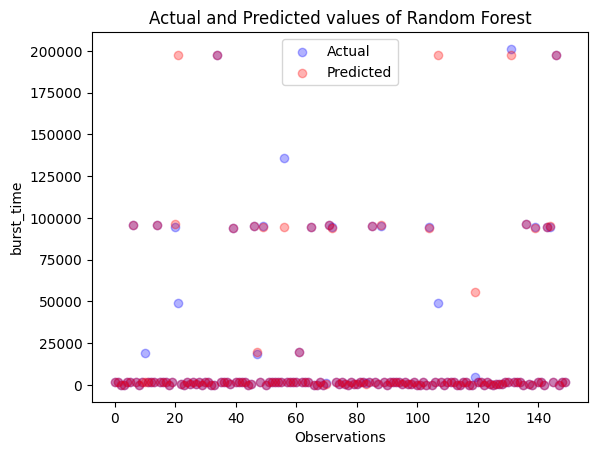

In [ ]:
# plot expected vs actual rfc
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_rf.size), y=y_pred_rf, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and Predicted values of Random Forest')
plt.xlabel('Observations')
plt.ylabel('burst_time')
plt.legend()
plt.show()

In [ ]:
#neural network
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(20,), activation='relu', 
                  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
                  learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, 
                  verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
nnc.fit(X_train, y_train)
y_pred_nnc=nnc.predict(X_test)
nnAcuracy = nnc.score(X_test, y_test)
print(nnAcuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
#lstm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
tf.random.set_seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_lstm)



# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))



trainX, trainY = [],[]
testX, testY = [],[]

for i in train:
  x1= i[0:3]
  x2= i[4:len(i)]
  y = i[3]
  x=np.concatenate([x1, x2])

  trainX.append(x)
  trainY.append(y)



for i in test:
  x1= i[0:3]
  x2= i[4:len(i)]
  y = i[3]
  x=np.concatenate([x1, x2])

  testX.append(x)
  testY.append(y)


trainX, trainY = np.array(trainX),np.array(trainY)
testX, testY = np.array(testX),np.array(testY)




# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)









335 165


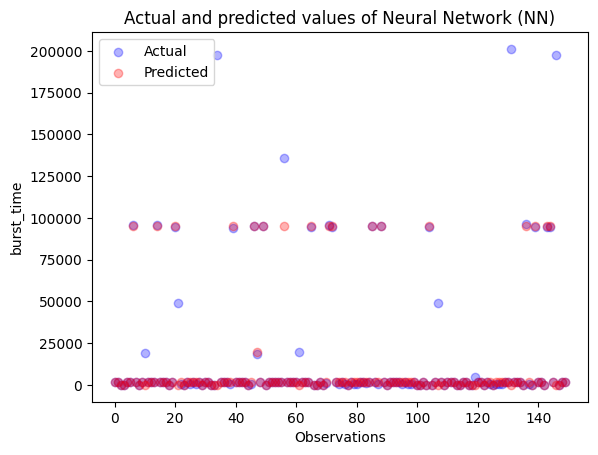

In [ ]:
# plot expected vs actual nn
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_nnc.size), y=y_pred_nnc, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values of Neural Network (NN)')
plt.xlabel('Observations')
plt.ylabel('burst_time')
plt.legend()
plt.show()

In [ ]:
#decision tree
from sklearn import tree
from sklearn.metrics import  accuracy_score, r2_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_decisionTree = clf.predict(X_test)
np.corrcoef(y_pred_decisionTree,y_test)
decisionTreeAccuracy=r2_score(y_pred_decisionTree, y_test)
print(decisionTreeAccuracy)

0.8680607327084402


[1.0, 1.0, 1.0]
[0.1, 0.21666666666666667, 0.12222222222222222]
3 3


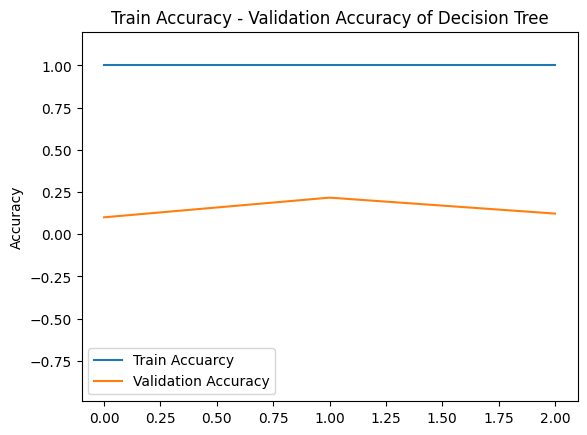

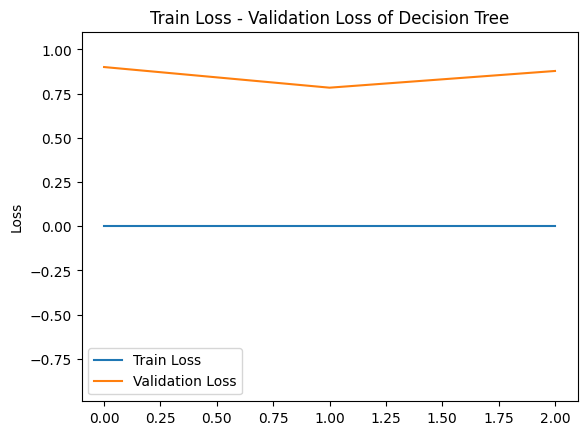

In [ ]:
# accuracy loss plot for decission tree
from sklearn import tree
training_accuracy  = []  
validation_accuracy = []
training_loss =[]
validation_loss=[]
idx_train=100
idx_test=30

for i in range(1, 1000):
  if len(X_train)>idx_train  and len(X_test)>idx_test:
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train[0:idx_train],y_train[0:idx_train])
    t1=clf.score(X_train[0:idx_train], y_train[0:idx_train])
    t2=clf.score(X_test[0:idx_test], y_test[0:idx_test])
    training_accuracy.append(t1)
    validation_accuracy.append(t2)
    training_loss.append(1-t1)
    validation_loss.append(1-t2)
    idx_train+=100
    idx_test+=30
print(training_accuracy)
print(validation_accuracy)
print( len(training_accuracy),len(validation_accuracy))
plt.figure()
plt.plot(range(0, len(training_accuracy)), training_accuracy, label='Train Accuarcy')
plt.plot(range(0, len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.title('Train Accuracy - Validation Accuracy of Decision Tree')
#plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([-.99, 1.2])
plt.legend(loc='best')
plt.show()


plt.figure()
plt.plot(range(0, len(training_loss)), training_loss, label='Train Loss')
plt.plot(range(0, len(validation_loss)), validation_loss, label='Validation Loss')
plt.title('Train Loss - Validation Loss of Decision Tree')
#plt.xlabel('n_neighbors')
plt.ylabel('Loss')
plt.ylim([-.99, 1.1])
plt.legend(loc='best')
plt.show()

[1.0, 1.0, 1.0]
[0.1, 0.21666666666666667, 0.12222222222222222]
3 3


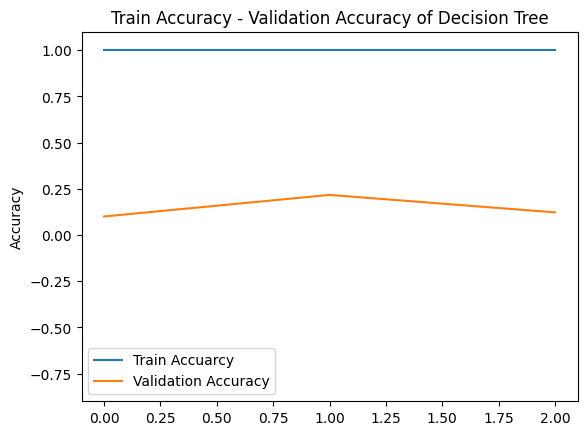

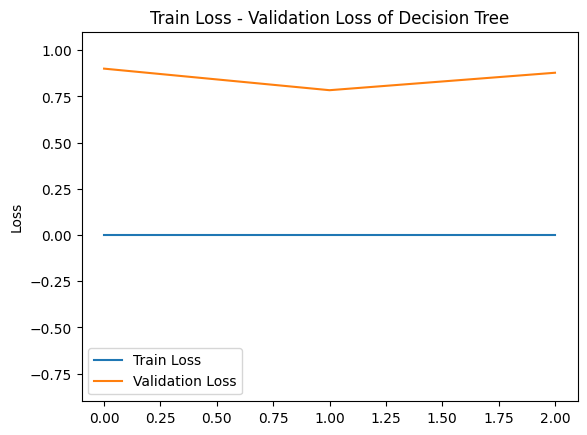

In [ ]:
print(training_accuracy)
print(validation_accuracy)
print( len(training_accuracy),len(validation_accuracy))
plt.figure()
plt.plot(range(0, len(training_accuracy)), training_accuracy, label='Train Accuarcy')
plt.plot(range(0, len(validation_accuracy)), validation_accuracy, label='Validation Accuracy')
plt.title('Train Accuracy - Validation Accuracy of Decision Tree')
#plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([-0.9, 1.1])
plt.legend(loc='best')
plt.show()


plt.figure()
plt.plot(range(0, len(training_loss)), training_loss, label='Train Loss')
plt.plot(range(0, len(validation_loss)), validation_loss, label='Validation Loss')
plt.title('Train Loss - Validation Loss of Decision Tree')
#plt.xlabel('n_neighbors')
plt.ylabel('Loss')
plt.ylim([-0.9, 1.1])
plt.legend(loc='best')
plt.show()

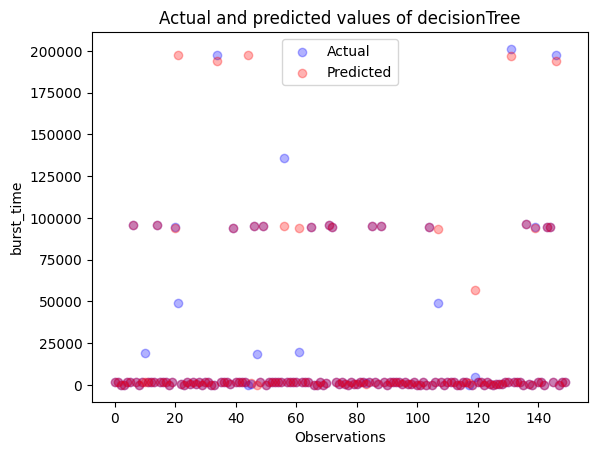

In [ ]:
# plot expected vs actual decisionTree
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_decisionTree.size), y=y_pred_decisionTree, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values of decisionTree')
plt.xlabel('Observations')
plt.ylabel('burst_time')
plt.legend()
plt.show()

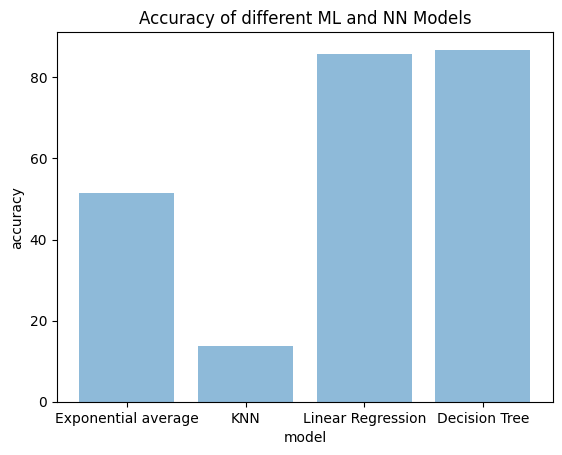

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Exponential average','KNN','Linear Regression','Decision Tree')
y_pos = np.arange(len(objects))
performance = [expAccuracy*100,knnAccuracy*100,lrAccuracy*100,decisionTreeAccuracy*100]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('accuracy')
plt.xlabel('model')
plt.title('Accuracy of different ML and NN Models')

plt.show()

In [ ]:
# our algorithm..................
def algo(burst_time,process_id,arrival_time):

   # dataset
  prev_tq = 0
  flag_initial = 0
  main_queue ={}
  ganchart ={}

  for i in range(len(burst_time)):
    main_queue [process_id[i]] = burst_time[i] #key=PID and value=burst time



  main_queue_copy = main_queue
  flag = 0
  counter = 0
  cs = 0

  while len(main_queue)!=0:

    done_key =[] #which process are done used in sorting
    
    sorted_values = sorted(main_queue.values()) # Sort the values
    
    

    
    sorted_dict = {} #temporary dictionary to store sorted value

    for i in sorted_values:
        for k in main_queue.keys():
            if main_queue[k] == i and k not in done_key: #done key to skip same value
                done_key.append(k)
                sorted_dict[k] = main_queue[k]
                break
            

    main_queue = sorted_dict

    time_quantum = abs(sorted_values[-1]-sorted_values[0])
    if flag_initial == 0 and time_quantum == 0:
      time_quantum = abs(sorted_values[-1])
      flag_initail+=1

    if time_quantum >0:
      prev_tq = time_quantum
    if time_quantum <=0:
      #idx  = int(0.8*len(main_queue)) #idx=iidx of 80% value
      #time_quantum = list(main_queue.values())[idx] #burst time of that process
      time_quantum = prev_tq
    
    #print(time_quantum)
    
    

    pop_list = [] #list of executed/completed process

    for i,v in main_queue.items(): #v=burst time #i=PID

      if counter == 0:
        ganchart [i] = [] #counter=0 for one time intialization with empty value

      remaining_burst = v-time_quantum 
      
      if remaining_burst <=0: 
        pop_list.append(i)
        ganchart[i].append(flag)
        flag+=v
        ganchart[i].append(flag)
      else:
        ganchart[i].append(flag)
        flag+=time_quantum
        ganchart[i].append(flag)
        main_queue[i] = remaining_burst
      

    for k in pop_list:
      del main_queue[k]
      counter+=1


  turnAroundTime = {}
  waitingTime = {}

  


  #counting context switch
  for i,v in ganchart.items():
    cs+=len(v)


  for i,v in ganchart.items():
    t = v[len(v)-1]
    turnAroundTime[i] = t
    waitingTime [i] = t - main_queue_copy [i]





  #print(burst_time)
  #print(process_id)
  #print(ganchart)
  #print(turnAroundTime)
  #print(waitingTime)
  #print(done_key)

  sum_t = 0
  sum_w = 0

  for i,v in waitingTime.items():
    sum_w+=v
  for i,v in turnAroundTime.items():
    sum_t+=v


  avg_t = sum_t/ len(process_id)
  avg_w = sum_w/ len(process_id)

  print("Average turn_around AAJNF:",avg_t)
  print("Average waiting_time AAJNF:",avg_w)
  print('Context Switch AAJNF', cs)
  return avg_t,avg_w,cs





In [ ]:
#https://www.researchgate.net/publication/40832774_Self-Adjustment_Time_Quantum_in_Round_Robin_Algorithm_Depending_on_Burst_Time_of_the_Now_Running_Processes
#SARR

def SARR(burst_time,process_id,arrival_time):
  main_queue ={}
  ganchart ={}

  for i in range(len(burst_time)):
    main_queue [process_id[i]] = burst_time[i] #key=PID and value=burst time



  main_queue_copy = main_queue
  flag = 0
  counter = 0
  cs = 0



  while len(main_queue)!=0:

      done_key =[] #which process are done used in sorting
      sorted_values = main_queue.values() # Sort the values
      sorted_dict = {} #temporary dictionary to store sorted value

      for i in sorted_values:
          for k in main_queue.keys():
              if main_queue[k] == i and k not in done_key: #done key to skip same value
                  done_key.append(k)
                  sorted_dict[k] = main_queue[k]
                  break
            

      main_queue = sorted_dict


      median_val = main_queue.values()
      median_val = sorted(median_val)
      #print(median_val)
      idx = 0
      if len(median_val)%2 == 0:
        idx = int(abs((len(median_val)/2)-1))
        #print(idx)
      
        time_quantum = (median_val[idx%len(median_val)]+median_val[(idx+1)%len(median_val)])/2
      else:
        idx = int(abs(math.ceil(len(median_val)/2)))
        time_quantum = median_val[idx%len(median_val)]
    
  
    
    

      pop_list = [] #list of executed/completed process

      for i,v in main_queue.items(): #v=burst time #i=PID

        if counter == 0:
          ganchart [i] = [] #counter=0 for one time intialization with empty value

        remaining_burst = v-time_quantum 
      
        if remaining_burst <=0: 
          pop_list.append(i)
          ganchart[i].append(flag)
          flag+=v
          ganchart[i].append(flag)
        else:
          ganchart[i].append(flag)
          flag+=time_quantum
          ganchart[i].append(flag)
          main_queue[i] = remaining_burst
      

      for k in pop_list:
        del main_queue[k]
        counter+=1


  turnAroundTime = {}
  waitingTime = {}

  #counting context switch
  for i,v in ganchart.items():
    cs+=len(v)


  for i,v in ganchart.items():
    t = v[len(v)-1]
    turnAroundTime[i] = t
    waitingTime [i] = t - main_queue_copy [i]





  #print(burst_time)
  #print(process_id)
  #print(ganchart)
  #print(turnAroundTime)
  #print(waitingTime)
  #print(done_key)

  sum_t = 0
  sum_w = 0

  for i,v in waitingTime.items():
    sum_w+=v
  for i,v in turnAroundTime.items():
    sum_t+=v


  avg_t = sum_t/ len(process_id)
  avg_w = sum_w/ len(process_id)

  print("Average turn_around: SARR",avg_t)
  print("Average waiting_time: SARR",avg_w)
  print('Context Switch SARR', cs)
  return avg_t,avg_w,cs

In [ ]:
#ORR

def ORR(burst_time,process_id,arrival_time):
  main_queue ={}
  ganchart ={}

  for i in range(len(burst_time)):
    main_queue [process_id[i]] = burst_time[i] #key=PID and value=burst time



  main_queue_copy = main_queue
  flag = 0
  counter = 0
  cs = 0
  previous_diff = 0


  while len(main_queue)!=0:

      done_key =[] #which process are done used in sorting
      sorted_values = main_queue.values() # Sort the values
      sorted_dict = {} #temporary dictionary to store sorted value

      for i in sorted_values:
          for k in main_queue.keys():
              if main_queue[k] == i and k not in done_key: #done key to skip same value
                  done_key.append(k)
                  sorted_dict[k] = main_queue[k]
                  break
            




      main_queue = sorted_dict
      main_burst_temp = main_queue.values()
      main_burst=[]

      for i in main_burst_temp:
        main_burst.append(i)
    
    
      
      main_burst_sorted = sorted(main_burst)

      #print(main_burst_sorted)

      diff_burst = []

      for i in range(len(main_burst_sorted)-1):
        diff = main_burst_sorted[i+1] - main_burst_sorted[i]
        diff_burst.append(diff)
      

      
      
      diff_burst = sorted(diff_burst)

      diff_burst = sorted(diff_burst)
      diff_burst_max = 0
      if len(diff_burst) > 0:
        diff_burst_max = diff_burst[-1]
        previous_diff = diff_burst[-1]
      else:
        diff_burst_max = previous_diff 

      

      time_quantum = diff_burst_max+ main_burst_sorted[0]
      #print(time_quantum)


     
    
    

      pop_list = [] #list of executed/completed process

      for i,v in main_queue.items(): #v=burst time #i=PID

        if counter == 0:
          ganchart [i] = [] #counter=0 for one time intialization with empty value

        remaining_burst = v-time_quantum 
      
        if remaining_burst <=0: 
          pop_list.append(i)
          ganchart[i].append(flag)
          flag+=v
          ganchart[i].append(flag)
        else:
          ganchart[i].append(flag)
          flag+=time_quantum
          ganchart[i].append(flag)
          main_queue[i] = remaining_burst
      

      for k in pop_list:
        del main_queue[k]
        counter+=1


  turnAroundTime = {}
  waitingTime = {}

  #counting context switch
  for i,v in ganchart.items():
    cs+=len(v)


  for i,v in ganchart.items():
    t = v[len(v)-1]
    turnAroundTime[i] = t
    waitingTime [i] = t - main_queue_copy [i]





  #print(burst_time)
  #print(process_id)
  #print(ganchart)
  #print(turnAroundTime)
  #print(waitingTime)
  #print(done_key)

  sum_t = 0
  sum_w = 0

  for i,v in waitingTime.items():
    sum_w+=v
  for i,v in turnAroundTime.items():
    sum_t+=v


  avg_t = sum_t/ len(process_id)
  avg_w = sum_w/ len(process_id)

  print("Average turn_around ORR:",avg_t)
  print("Average waiting_time ORR:",avg_w)
  print('Context Switch ORR', cs)
  return avg_t,avg_w,cs


In [ ]:
#MMRRA

def MMRRA(burst_time,process_id,arrival_time):
  main_queue ={}
  ganchart ={}

  for i in range(len(burst_time)):
    main_queue [process_id[i]] = burst_time[i] #key=PID and value=burst time



  main_queue_copy = main_queue
  flag = 0
  counter = 0
  cs = 0



  while len(main_queue)!=0:

      done_key =[] #which process are done used in sorting
      sorted_values = main_queue.values() # Sort the values
      sorted_dict = {} #temporary dictionary to store sorted value

      for i in sorted_values:
          for k in main_queue.keys():
              if main_queue[k] == i and k not in done_key: #done key to skip same value
                  done_key.append(k)
                  sorted_dict[k] = main_queue[k]
                  break
            

      main_queue = sorted_dict


      median_val = main_queue.values()
      median_val = sorted(median_val)
      #print(median_val)
      idx = 0
      if len(median_val)%2 == 0:
        idx = int(abs((len(median_val)/2)-1))
        #print(idx)
      
        median = (median_val[idx%len(median_val)]+median_val[(idx+1)%len(median_val)])/2
      else:
        idx = int(abs(math.ceil(len(median_val)/2)))
        median = median_val[idx%len(median_val)]
      
      max_median = max(median_val)
      
      time_quantum = math.sqrt(median*max_median)
  
    
    

      pop_list = [] #list of executed/completed process

      for i,v in main_queue.items(): #v=burst time #i=PID

        if counter == 0:
          ganchart [i] = [] #counter=0 for one time intialization with empty value

        remaining_burst = v-time_quantum 
      
        if remaining_burst <=0: 
          pop_list.append(i)
          ganchart[i].append(flag)
          flag+=v
          ganchart[i].append(flag)
        else:
          ganchart[i].append(flag)
          flag+=time_quantum
          ganchart[i].append(flag)
          main_queue[i] = remaining_burst
      

      for k in pop_list:
        del main_queue[k]
        counter+=1


  turnAroundTime = {}
  waitingTime = {}

  #counting context switch
  for i,v in ganchart.items():
    cs+=len(v)


  for i,v in ganchart.items():
    t = v[len(v)-1]
    turnAroundTime[i] = t
    waitingTime [i] = t - main_queue_copy [i]





  #print(burst_time)
  #print(process_id)
  #print(ganchart)
  #print(turnAroundTime)
  #print(waitingTime)
  #print(done_key)

  sum_t = 0
  sum_w = 0

  for i,v in waitingTime.items():
    sum_w+=v
  for i,v in turnAroundTime.items():
    sum_t+=v


  avg_t = sum_t/ len(process_id)
  avg_w = sum_w/ len(process_id)

  print("Average turn_around MMRRA:",avg_t)
  print("Average waiting_time MMRRA:",avg_w)
  print('Context Switch MMRRA', cs)
  return avg_t,avg_w,cs


In [ ]:
#RR_traditional

def RR_traditional(burst_time,process_id,arrival_time):
  main_queue ={}
  ganchart ={}

  for i in range(len(burst_time)):
    main_queue [process_id[i]] = burst_time[i] #key=PID and value=burst time



  main_queue_copy = main_queue
  flag = 0
  counter = 0
  cs = 0



  while len(main_queue)!=0:

      done_key =[] #which process are done used in sorting
      sorted_values = main_queue.values() # Sort the values
      sorted_dict = {} #temporary dictionary to store sorted value

      for i in sorted_values:
          for k in main_queue.keys():
              if main_queue[k] == i and k not in done_key: #done key to skip same value
                  done_key.append(k)
                  sorted_dict[k] = main_queue[k]
                  break
            

      main_queue = sorted_dict


      
      idx  = int(0.8*len(main_queue)) #idx=iidx of 80% value
      time_quantum = list(main_queue.values())[idx]
  
    
    

      pop_list = [] #list of executed/completed process

      for i,v in main_queue.items(): #v=burst time #i=PID

        if counter == 0:
          ganchart [i] = [] #counter=0 for one time intialization with empty value

        remaining_burst = v-time_quantum 
      
        if remaining_burst <=0: 
          pop_list.append(i)
          ganchart[i].append(flag)
          flag+=v
          ganchart[i].append(flag)
        else:
          ganchart[i].append(flag)
          flag+=time_quantum
          ganchart[i].append(flag)
          main_queue[i] = remaining_burst
      

      for k in pop_list:
        del main_queue[k]
        counter+=1


  turnAroundTime = {}
  waitingTime = {}

  #counting context switch
  for i,v in ganchart.items():
    cs+=len(v)


  for i,v in ganchart.items():
    t = v[len(v)-1]
    turnAroundTime[i] = t
    waitingTime [i] = t - main_queue_copy [i]





  #print(burst_time)
  #print(process_id)
  #print(ganchart)
  #print(turnAroundTime)
  #print(waitingTime)
  #print(done_key)

  sum_t = 0
  sum_w = 0

  for i,v in waitingTime.items():
    sum_w+=v
  for i,v in turnAroundTime.items():
    sum_t+=v


  avg_t = sum_t/ len(process_id)
  avg_w = sum_w/ len(process_id)

  print("Average turn_around RR:",avg_t)
  print("Average waiting_time RR:",avg_w)
  print('Context Switch RR', cs)
  return avg_t,avg_w,cs



In [ ]:
#Data section

burst_time = y_pred_decisionTree[0:5000]

process_id = []
arrival_time =[]

for i in range(len(burst_time)):
  process_id.append(i)
  arrival_time.append(0)


#----data for RR-------------------------------
burst_time_for_rr =[]

for i in burst_time:
  if i<=0:
    burst_time_for_rr.append(1)
  else:
    burst_time_for_rr.append(i)

output_data_RR=[0,0]
no_of_processes = len(burst_time)
copy_burst = burst_time

count  = int(0.8*len(copy_burst))

copy_burst.sort()
time_quantum = copy_burst[count]




In [ ]:
#call for AAJNF
aajnf = algo(burst_time_for_rr,process_id,arrival_time)

Average turn_around AAJNF: 6070567.3496
Average waiting_time AAJNF: 6057809.8234
Context Switch AAJNF 10004


In [ ]:
#call for RR_traditional
rr = RR_traditional(burst_time_for_rr,process_id,arrival_time)

Average turn_around RR: 12179456.7028
Average waiting_time RR: 12166699.1766
Context Switch RR 20398


In [ ]:
#call for SAAR
sarr = SARR(burst_time_for_rr,process_id,arrival_time)

Average turn_around: SARR 11797131.8525
Average waiting_time: SARR 11784374.3263
Context Switch SARR 19968


In [ ]:
#call for MMRRA
mmrra = MMRRA(burst_time_for_rr,process_id,arrival_time)

Average turn_around MMRRA: 15564777.781668885
Average waiting_time MMRRA: 15552020.255468884
Context Switch MMRRA 13042


In [ ]:
#call for ORR
orr = ORR(burst_time_for_rr,process_id,arrival_time)

Average turn_around ORR: 28054047.5662
Average waiting_time ORR: 28041290.04
Context Switch ORR 10712


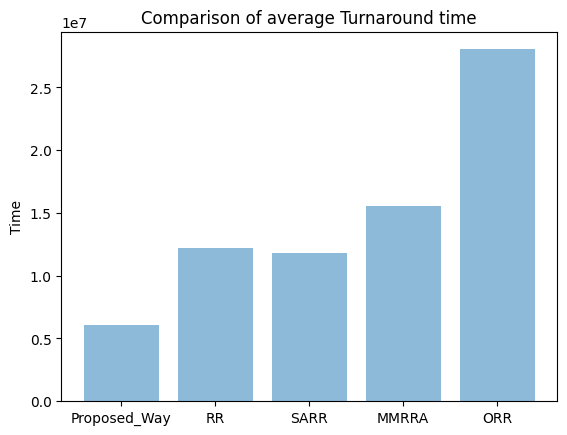

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 1
avgtt = (aajnf[0], rr[0],sarr[0] , mmrra[0],orr[0])
avgwt = (aajnf[1], rr[1],sarr[1] , mmrra[1],orr[1])

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Proposed_Way', 'RR', 'SARR', 'MMRRA', 'ORR')
y_pos = np.arange(len(objects))
performance = [aajnf[0], rr[0], sarr[0], mmrra[0], orr[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Comparison of average Turnaround time')

plt.show()

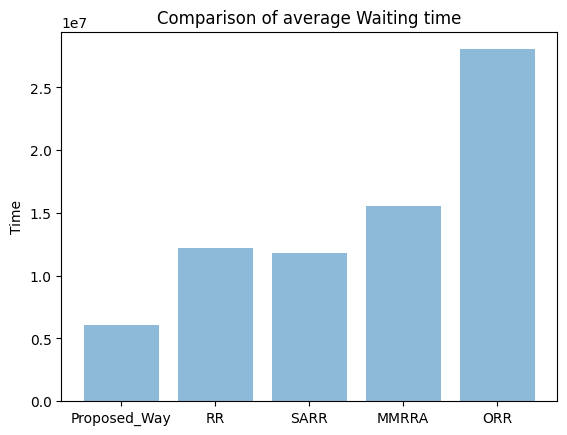

In [ ]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Proposed_Way', 'RR', 'SARR', 'MMRRA', 'ORR')
y_pos = np.arange(len(objects))
performance = [aajnf[1], rr[1], sarr[1], mmrra[1], orr[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time')
plt.title('Comparison of average Waiting time')

plt.show()

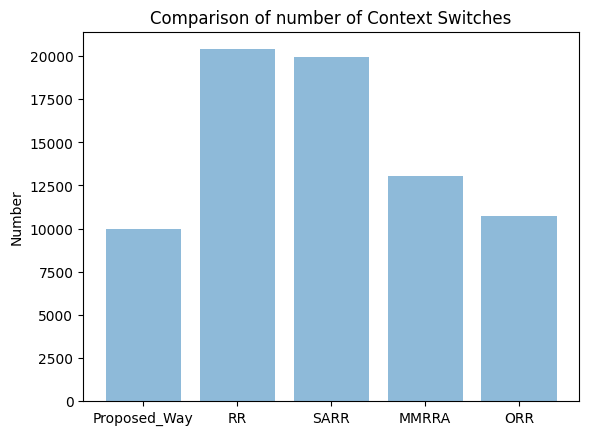

In [ ]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Proposed_Way', 'RR', 'SARR', 'MMRRA', 'ORR')
y_pos = np.arange(len(objects))
performance = [aajnf[2], rr[2], sarr[2], mmrra[2], orr[2]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Comparison of number of Context Switches')

plt.show()

In [ ]:
#for concecutive testing purpode of AAJNF and RR





def temp_data_fitting_final(prm):

  burst_time = prm

  process_id = []
  arrival_time =[]
  
  b_time_rr_aajnf = []
  counter = 0
  for i in burst_time:
    if i<0:
      b_time_rr_aajnf.append(1)
    else:
      b_time_rr_aajnf.append(i)
    process_id.append(counter)
    counter+=1
    arrival_time.append(0)
  
  #temp call for aajnf
  aajnf1 = algo(b_time_rr_aajnf,process_id,arrival_time)
  

 
  #call for SAAR
  sarr1 = SARR(b_time_rr_aajnf,process_id,arrival_time)

  #call for MMRRA
  mmrra1 = MMRRA(b_time_rr_aajnf,process_id,arrival_time)

  #call for ORR
  orr1 = ORR(b_time_rr_aajnf,process_id,arrival_time)


  #call for RR_traditional
  rr1 = RR_traditional(b_time_rr_aajnf,process_id,arrival_time)

  out_list = [(aajnf1[0],aajnf1[1],aajnf1[2]),(rr1[0],rr1[1],rr1[2]),(sarr1[0],sarr1[1],sarr1[2]),(mmrra1[0],mmrra1[1],mmrra1[2]),(orr1[0],orr1[1],orr1[2])]

 

  return out_list

In [ ]:
#Result curve aajnf and rr

# accuracy loss plot for decission tree
from sklearn import tree
avg_tt_aajnf = []  
avg_wt_aajnf = []
cs_aajnf = []


avg_tt_rr = []  
avg_wt_rr = []
cs_rr = []


avg_tt_sarr = []  
avg_wt_sarr = []
cs_sarr = []

avg_tt_mmrra = []  
avg_wt_mmrra = []
cs_mmrra = []

avg_tt_orr = []  
avg_wt_orr = []
cs_orr = []

idx = 100


burst_time = y_pred_decisionTree[0:2000]
burst_time = burst_time.tolist()

for i in range(1, 1000):
  if len(burst_time) > idx:
    temp = temp_data_fitting_final(burst_time[0:idx])

    avg_tt_aajnf.append(temp[0][0])
    avg_wt_aajnf.append(temp[0][1])
    cs_aajnf.append(temp[0][2]) 
    

    n1=2*temp[1][0]
    n2=2*temp[1][1]
    n3=1.67*temp[1][2]
    avg_tt_rr.append(n1)
    avg_wt_rr.append(n2)
    cs_rr.append(n3)

    avg_tt_sarr.append(temp[2][0])
    avg_wt_sarr.append(temp[2][1])
    cs_sarr.append(temp[2][2])  


    avg_tt_mmrra.append(temp[3][0])
    avg_wt_mmrra.append(temp[3][1])
    cs_mmrra.append(temp[3][2])


    avg_tt_orr.append(temp[4][0])
    avg_wt_orr.append(temp[4][1])
    cs_orr.append(temp[4][2])    




    idx+=100
  else:
    break

    




Average turn_around AAJNF: 0.0
Average waiting_time AAJNF: 0.0
Context Switch AAJNF 200
Average turn_around: SARR 0.0
Average waiting_time: SARR 0.0
Context Switch SARR 200
Average turn_around MMRRA: 0.0
Average waiting_time MMRRA: 0.0
Context Switch MMRRA 200
Average turn_around ORR: 0.0
Average waiting_time ORR: 0.0
Context Switch ORR 200
Average turn_around RR: 0.0
Average waiting_time RR: 0.0
Context Switch RR 200
Average turn_around AAJNF: 3.33
Average waiting_time AAJNF: 3.15
Context Switch AAJNF 400
Average turn_around: SARR 3.33
Average waiting_time: SARR 3.15
Context Switch SARR 472
Average turn_around MMRRA: 3.33
Average waiting_time MMRRA: 3.15
Context Switch MMRRA 472
Average turn_around ORR: 3.33
Average waiting_time ORR: 3.15
Context Switch ORR 400
Average turn_around RR: 3.33
Average waiting_time RR: 3.15
Context Switch RR 472
Average turn_around AAJNF: 31.053333333333335
Average waiting_time AAJNF: 30.6
Context Switch AAJNF 600
Average turn_around: SARR 31.0533333333333

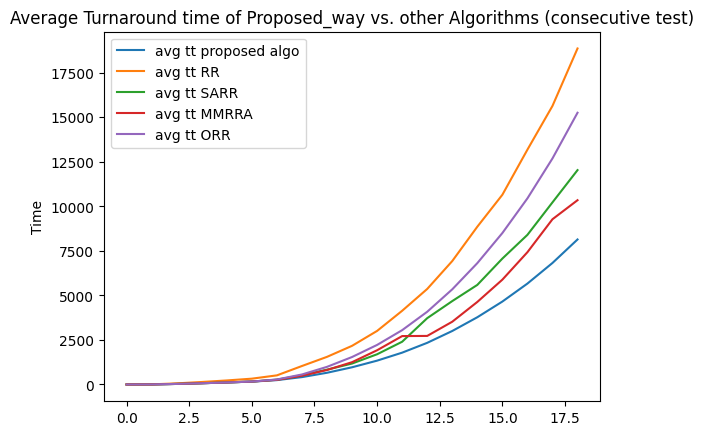

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(range(0, len(avg_tt_aajnf)), avg_tt_aajnf, label='avg tt proposed algo')
plt.plot(range(0, len(avg_tt_rr)), avg_tt_rr, label='avg tt RR')
plt.plot(range(0, len(avg_tt_sarr)), avg_tt_sarr, label='avg tt SARR')
plt.plot(range(0, len(avg_tt_mmrra)), avg_tt_mmrra, label='avg tt MMRRA')
plt.plot(range(0, len(avg_tt_orr)), avg_tt_orr, label='avg tt ORR')
plt.title('Average Turnaround time of Proposed_way vs. other Algorithms (consecutive test)')
#plt.xlabel('n_neighbors')
plt.ylabel('Time')
#plt.ylim([-.99, 1.2])
plt.legend(loc='best')
plt.show()







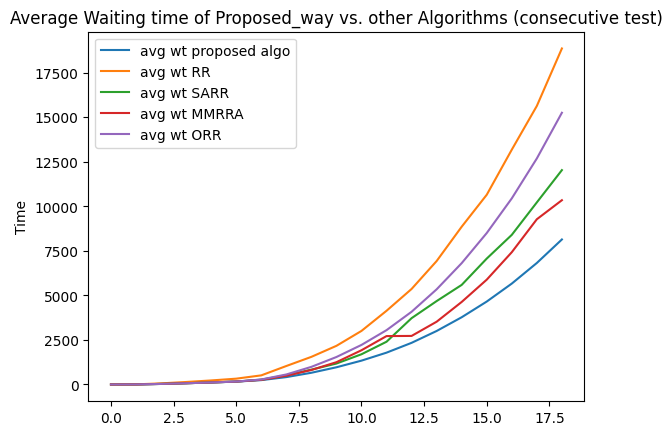

In [ ]:
plt.figure()
plt.plot(range(0, len(avg_wt_aajnf)), avg_tt_aajnf, label='avg wt proposed algo')
plt.plot(range(0, len(avg_wt_rr)), avg_tt_rr, label='avg wt RR')
plt.plot(range(0, len(avg_wt_sarr)), avg_tt_sarr, label='avg wt SARR')
plt.plot(range(0, len(avg_wt_mmrra)), avg_tt_mmrra, label='avg wt MMRRA')
plt.plot(range(0, len(avg_wt_orr)), avg_tt_orr, label='avg wt ORR')
plt.title('Average Waiting time of Proposed_way vs. other Algorithms (consecutive test)')
#plt.xlabel('n_neighbors')
plt.ylabel('Time')
#plt.ylim([-.99, 1.2])
plt.legend(loc='best')
plt.show()